# Chapter 4: Linear Regressions, before and after fitting the model

## 4.1 Linear Transformations

- Purpose: make coefficients more interpretable and easy to understand
- Linear transformations do not affect fit or predictions of regression models

### Ways you can conduct linear transformations:
* Scale the predictor (change predictor units)
* Standardization using z-scores
   * z.variable = (variable - mean(variable)) / (2*sd(variable))
   * Divide by 2sd instead of 2sd because it scales binary variables better (see explanation below)
* Standardization by reasonable scales
    * Example: dividing income by 10,000
    * Example: rescaling a 1-7 scale (1 = strong Republican, 7 = stronge Democart) on a -1 to 1 scale

#### Why divide by 2SD?

If you have a binary predictor, you expect the difference between these two "states" to have 1 "unit" of difference. For example, if female=0 and male=1 and the coefficient is (hypothetically) 3.8, then a change from female to male should equal to 3.8 inches. Assuming the proportion of females ot males is approximately 0.5, the SD is also approximately 0.5. Thus, when you standardize by 1SD, you get:

$z.female = (female - 0.5)/0.5 
           = (0-0.5)/0.5
           = -1$
           
$z.male = (male - 0.5)/0.5
       = (1-0.5)/0.5
       = +1$
       
Which means that if you have a coefficient of 3.8, the jump from female to male is actually $3.8(1-(-1))= 7.6$. Not intuitive! Instead, if we divide by 2SD, you get:

$z.female = (female - 0.5)/1
           = (0-0.5)/1
           = -0.5$
           
$z.male = (male - 0.5)/1
       = (1-0.5)/1
       = +0.5$
       
Which means if you have a coefficient of 3.8, then a jump from female to male also equates to a jump in 3.8 units. That is, $3.8(0.5-(-0.5))= 3.8$

## 4.2 Centering and standardizing

- Be careful interpreting intercepts when predictors are not standardized. 
    - e.g. If you predict child IQ from mother IQ, the intercept is the expected child IQ when the mother's IQ is 0-- which is an impossible scenario.
    
### Ways to center data
* Subtracting the mean of the data
    * If we predict child's IQ from mother's IQ, the intercept is the _average_ mother's IQ, rather than IQ = 0. Makes much more sense!
* Use a conventional centering point
    * e.g. IQ=100 is the "population average"-- we can subtract 100 from mother's IQs
* Standardizing by subtracting mean and dividing by 2 standard deviations
    * This makes comparing coefficients more intuitive.
    * E.g. The predictor for whether or not mom graduated high school (mom.hs) has a coefficient of 2.8, whereas the predictor for mom's IQ has a coefficient of 0.7. Does this mean it is more important that mom graduated high school? No! Because the _unit_ for IQ is 1, which is a tiny increment.
        * If you standardize, then the coefficients become 2.3 and 17.7, respectively-- which reflect expected changes in child IQ across 1 standard deviation in mom's traits. This is much more logical to compare!
* Multiply regression coefficients by 2 standard deviations of its predictor
    * Only applicable if no interactions present.
    * Provides sense of importance for each variable


## 4.3 Correlation and "regression to the mean"

The correlation between two standardized variables $(x-mean(x))/sd(x)$ will always be btween -1 and 1. If it is not, then variance of y must be > variance of x.

Slope of regression with one predictor:
$b = \rho \sigma_y / \sigma_x$

### Two different types of best fit lines, and the effect of regression to the mean
Principal components line = minimizes Euclidean distances between points (y=x)

Regression line minimizes sum of squares of _vertical_ distances between points and line

There thus tends to be an effect called "regression to the mean"-- predictions tend to be closer to the mean for the output variable than the predictor is to the input variable.




## 4.4 Logarithmic transformations

$log Y = \alpha +\beta X$

- Option when additivity and linearity are not reasonable assumptions
    - Log, specifically, corresponds to multiplicative scale
    - instead of (a + b + c), it's (a x b x c)
- Because of log properties, transforming back predictions will ALWAYS be positive.
- Note that depending on the variable dynamic range (i.e. whether ratios between high and low values are close to 1 or not), you may choose NOT to use log transformations for ease of interpretibility of variables.

### Natural log scale benefits/tricks
* when coefficients are SMALL (e.g. 0.06), it approximates % change on "real" scale
    * E.g. in $log(Earnings) ~ \beta height$ model, a coefficient of $\beta = 0.06$ is approximately a 6% increase for every unit of height
* To get standard errors of coefficients, simply exp(coef.se)

### Log base 10 benefits/tricks
* Intercepts are easier to interpret because base 10 is easy for us to understand. We know 5 on a log scale = 100,000, for example.

### Checking statistical significance
* Simply multiple the coefficient standard error by 2, and see whether coefficient +/- coef.se overlaps zero.
* You can keep this predictor in, even if it's not significant!

### Residual standard deviation
* A residual standard deviation means that approximately one standard deviation of the data (68% of the data) will fall within 0.88 units of the predicted value.
* E.g. if residual standard deviation is 0.88, then $exp(0.88)=2.4$, which means if the _expected_ earning on the log scale is 9.623, then 68% of people will fall within 9.623 +/- 0.88 (aka, 6000-36000 on the "real" scale)

### $R^2$ 
* Represents the amount of variance in the data explained by the regressio model

### Including an interactions
* Intercept = when all coefficients are equal to zero. May or may not be a meaningful number, depending on predictor scaling.
* coefficients on categorical main effects = change when predictor is "TRUE" (or =1) when all other coefficients (including interactions) are held at zero. Also may or may not be a meaningful number, depending on predictor scaling.
* coefficients on continuous main effects = change when predictor variable increases by "1", when all other coefficients (including interactions) are held at zero. Also may or may not be a meaningful number, depending on predictor scaling.
* coefficients of interactions (categorical * continuous) = the difference in slopes between two categories. 

### Log-log models

- models proportional changes in y to proportional changes in x.
- coefficient sometimes called "elasticity"



## 4.5 Other transformations

### Square root transformations
- Less severe than log, but also less interpretible

### Idosyncratic transformations
- Two-part models for zero-inflated data may be necessary
- Using carefully chosen discrete "bins" to categorize data

### Using continuous rather tha discrete predictors
- Can be useful to map binary predictors (e.g. "handed-ness"; left or right) on a continuous (-1, 1) scale
- Generally, avoid discretizing continuous variables because you lose information when you do this

### Using discrete rather than continuous predictors
- If transformations do not seem to fit your data, you can bin continuous data into categories
    - e.g. Age groups for voting, to account for generational patterns

### Index and indicator variables
- Index = divide population into categories
    - e.g. male--> 1 = male, 0 = female
- Indicator = presence or absence of traits
    - e.g. sex.1 --> 1 = females, 0 for not
    - e.g. sex.2 --> 1 = males, 0 for not
    
* Usually, when input has 2 levels we code as indicator variables and name it appropriately for ease of understanding.
* Usually, when input has multiple levels, we code as index variables 

### Identifiability
- When parameters cannot be estimated uniquely-- aka, when standard errors are infinite
    - most common a familiar case is when predictors are collinear, and there can be a linear combination of them that equals zero for ALL data
- R usually ignores nonidentified parameters, or spit out error/NA. For example, an indicator variable usually has the "first" factor as the intercept-- because you can't have all J indicators without the intercept being collinear with at least one of them.


## 4.6 Building regression models for predictions

### General principles
1. Include input variables you may _expect_ to be important
2. Don't be afraid to combined multiple predictors into one before modelling-- using an aggregate score
3. If an input has large effects, consider including their interactions
4. Broad rules for including predictors:
    a. Include non-significant predictors when they are in the direction you might expect-- they may improve predictions. 
    b. Do not include non-significant predictors that are no in the direction you expect.
    c. Reconsider or re-think significant predictors that do not go in the expected direction -- why is this happening?
    d. Obviously include significant predictors in the expected direction.
    
    

# 4.9 Exercises


In [4]:
library(tidyverse)
library(foreign)
library(arm)

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack

Loading required package: lme4

arm (Version 1.10-1, built: 2018-4-12)

Working directory is /Users/melissachen/Documents/PhD/Courses/Gelman_reading_group




1. 
Logarithmic transformation and regression: consider the following regression:
$log(weight) = −3.5 + 2.0 log(height) + error$

with errors that have standard deviation 0.25. Weights are in pounds and heights are in inches.
(a) Fill in the blanks: approximately 68% of the persons will have weights within a factor of __+1.28__  and __-1.28__  of their predicted values from the regression.


(b) Draw the regression line and scatterplot of log(weight) versus log(height) that make sense and are consistent with the fitted model. Be sure to label the axes of your graph.


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1          ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] 0.693

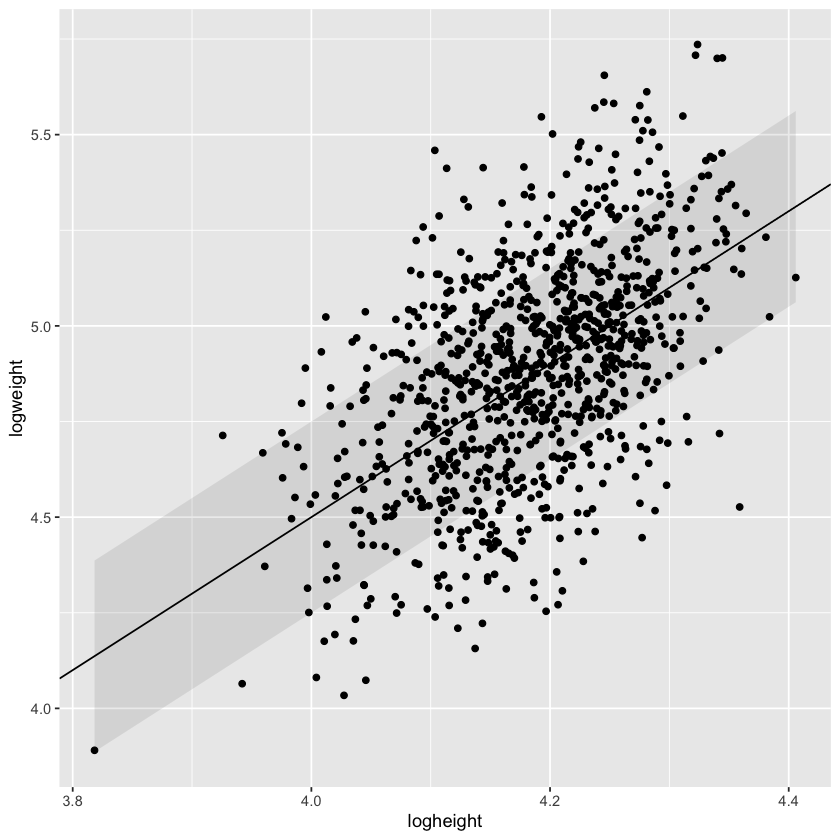

In [1]:
logweight_est <- function(x) {
  -3.5 + 2*log(x)
}

# Get distribution of normal height (in inches)
# weights <- rnorm(200,mean=160, sd = 30)
# logweight
n=1000
height <- rnorm(n, mean=66, sd=5)
pred_weight <- logweight_est(height)
logweight <- rnorm(n, mean=logweight_est(height), sd=rep(0.25, n))

fake_data <- cbind(height,logweight, pred_weight) %>%
  as_tibble() %>%
  mutate(logheight=log(height), pred_weight_lwr = pred_weight-0.25, pred_weight_upr = pred_weight+0.25) 
  

fake_data %>%
  as_tibble() %>%
  ggplot() +
  geom_ribbon(aes(x=logheight, ymin=pred_weight_lwr, ymax=pred_weight_upr), alpha=0.1) +
  geom_point(aes(x=log(height), y=logweight)) +
  geom_abline(aes(intercept=-3.5, slope=2) )

# Are 68% of data actually within my intervals?
fake_data %>%
  mutate(inside=ifelse(logweight>pred_weight_lwr & logweight<pred_weight_upr, TRUE, FALSE)) %>%
  pull(inside) %>%
  sum()/n


2. 
The folder earnings has data from the Work, Family, and Well-Being Survey (Ross, 1990). Pull out the data on earnings, sex, height, and weight.
(a) In R, check the dataset and clean any unusually coded data.



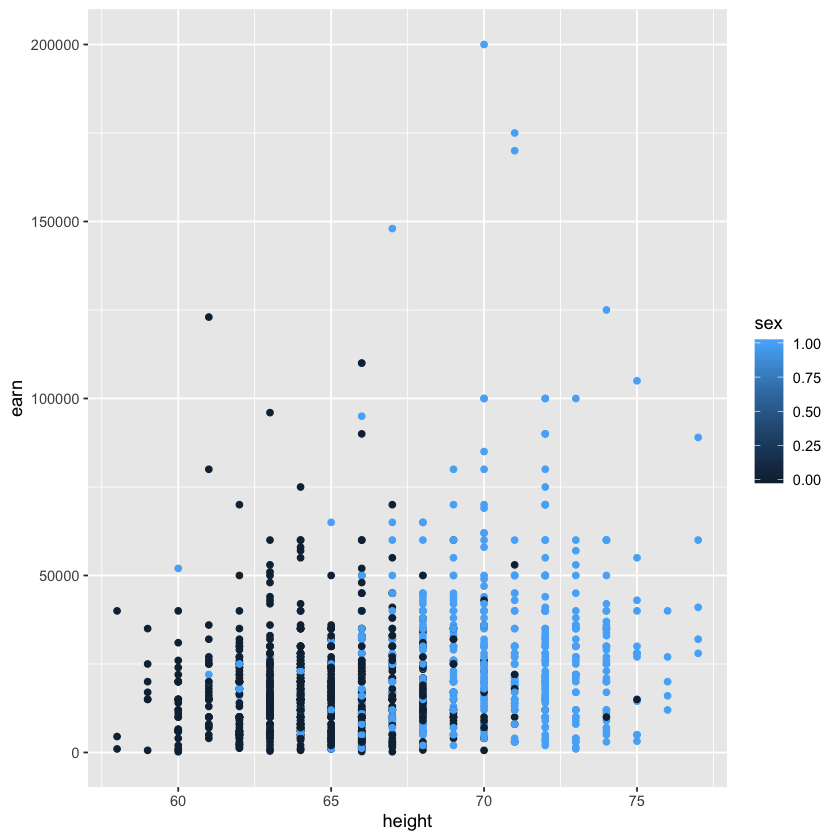

In [3]:
earnings <- read.dta("./ARM_Data/earnings/heights.dta")
earn <- earnings %>%
  select(earn, sex, height)
# Re-code sex as "male" = 1, and eliminate all data where earnings is NA; and eliminate all earnings == 0
earn <- earn %>%
  mutate(sex = ifelse(sex==1, 1, 0)) %>%
  filter(!is.na(earn), earn>0)
# Check appearance of data
earn %>%
  ggplot() +
  geom_point(aes(x=height, y=earn, col=sex)) 
  


(b) Fit a linear regression model predicting earnings from height. What transfor- mation should you perform in order to interpret the intercept from this model
as average earnings for people with average height?

I will subtract the mean of earnings and height.


In [9]:

earn <- earn %>%
  mutate(centered_earn=earn-mean(earn), centered_height=height-mean(height))

lm_earn <- lm(earn ~ height, data=earn)
lm_earn_centered <- lm(earn ~ centered_height, data=earn)


display(lm_earn)

# model centered around average height
display(lm_earn_centered)
# mean earning
mean(earn$earn)


lm(formula = earn ~ height, data = earn)
            coef.est  coef.se  
(Intercept) -61316.28   9525.18
height        1262.33    142.11
---
n = 1192, k = 2
residual sd = 18865.08, R-Squared = 0.06
lm(formula = earn ~ centered_height, data = earn)
                coef.est coef.se 
(Intercept)     23154.77   546.41
centered_height  1262.33   142.11
---
n = 1192, k = 2
residual sd = 18865.08, R-Squared = 0.06


[1] 23154.77

(c) Fit some regression models with the goal of predicting earnings from some
combination of sex, height, and weight. Be sure to try various transformations and interactions that might make sense. Choose your preferred model and justify.

I chose to transform earnings on a base 10 scale, since this is intuitive. I did not centre this, since it makes more sense for "average income" not to be zero-- I want to intercept to be average earnings at average height.

I include sex, and also include the interaction even though it's not significant bc it's still in the direction I'd expect.

In [16]:

# log transform earnings
earn <- earn %>%
  mutate(logearn = log(earn, base = 10))

lm_earn_centered <- lm(earn ~ centered_height*sex, data=earn)
display(lm_earn_centered, digits = 5)


lm(formula = earn ~ centered_height * sex, data = earn)
                    coef.est    coef.se    
(Intercept)         18656.67270   953.03777
centered_height       162.77506   275.22974
sex                  8818.90663  1540.36577
centered_height:sex   571.56789   393.12641
---
n = 1192, k = 4
residual sd = 18590.35493, R-Squared = 0.09


(d) Interpret all model coefficients.

Intercept: Earnings of the average heighted woman. (sex==0)
centered_height: per inch, the increase in earnings
The difference between the earnings of a man and woman at the same height
The difference between the slope of men and women as they increase in height

4. 
Logarithmic transformations: the folder pollution contains mortality rates and various environmental factors from 60 U.S. metropolitan areas (see McDonald and Schwing, 1973). For this exercise we shall model mortality rate given nitric oxides, sulfur dioxide, and hydrocarbons as inputs. This model is an extreme oversimplification as it combines all sources of mortality and does not adjust for crucial factors such as age and smoking. We use it to illustrate log transforma- tions in regression.
(a) Create a scatterplot of mortality rate versus level of nitric oxides. Do you think linear regression will fit these data well? Fit the regression and evaluate a residual plot from the regression.


lm(formula = mort ~ nox, data = poll)
            coef.est coef.se
(Intercept) 942.71     9.00 
nox          -0.10     0.18 
---
n = 60, k = 2
residual sd = 62.55, R-Squared = 0.01


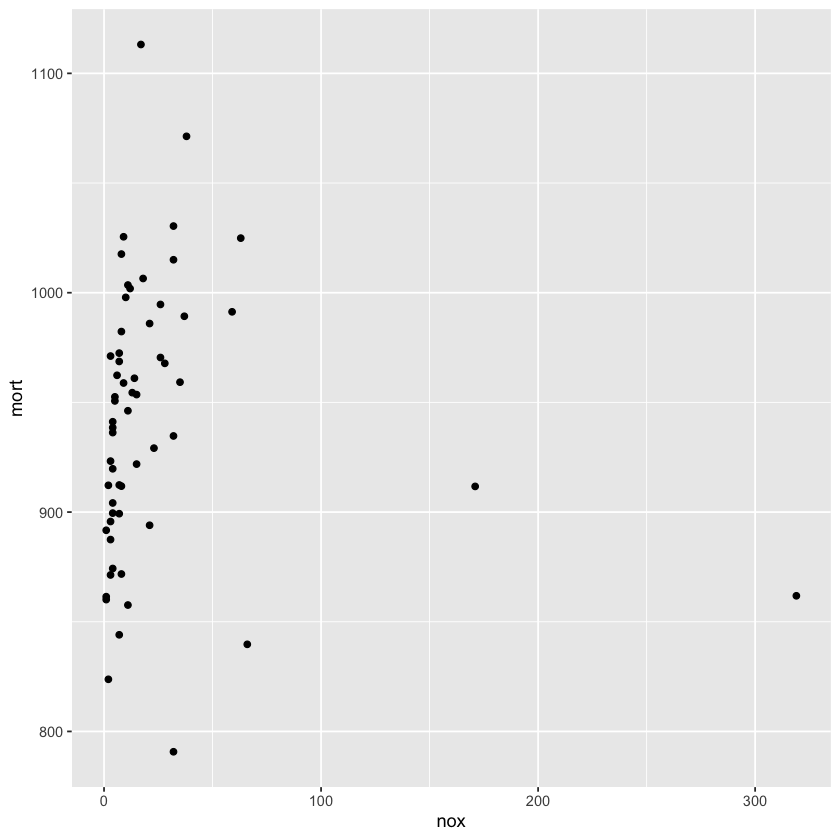

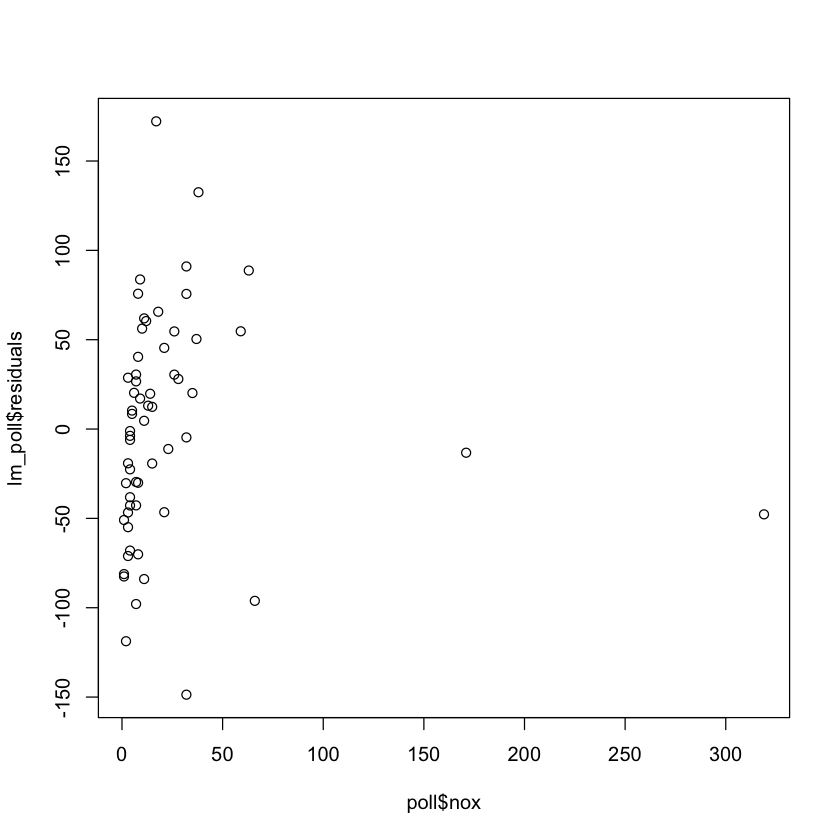

In [18]:
poll <- read.dta("./pollution.dta")
poll %>%
  ggplot() +
  geom_point(aes(x=nox, y=mort))

lm_poll <- lm(mort ~ nox, data=poll)
display(lm_poll)
plot(lm_poll$residuals ~ poll$nox)


(b) Find an appropriate transformation that will result in data more appropriate for linear regression. Fit a regression to the transformed data and evaluate the new residual plot.



lm(formula = (mort) ~ log(nox), data = poll)
            coef.est coef.se
(Intercept) 904.72    17.17 
log(nox)     15.34     6.60 
---
n = 60, k = 2
residual sd = 60.01, R-Squared = 0.09


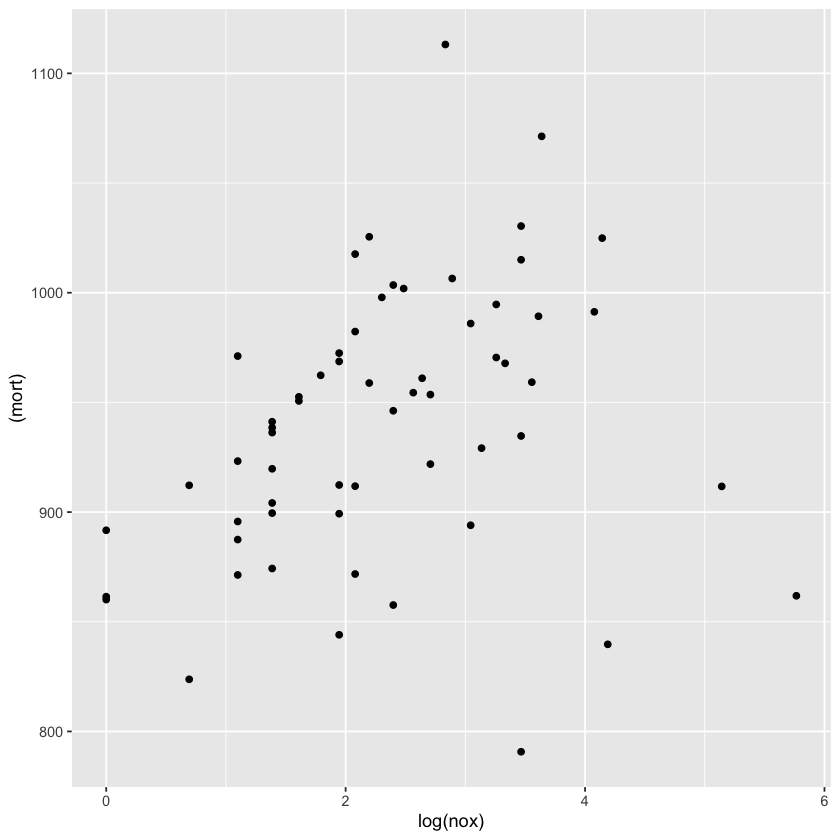

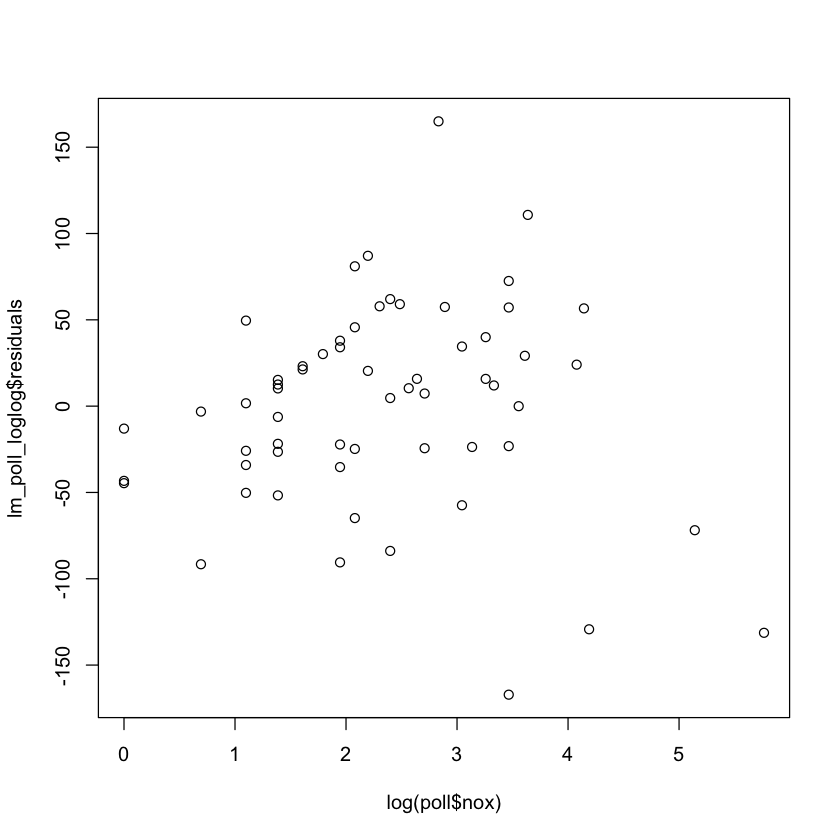

In [21]:
poll %>%
  ggplot() +
  geom_point(aes(x=log(nox), y=(mort)))

lm_poll_loglog <- lm((mort) ~ log(nox), data=poll)
display(lm_poll_loglog)
plot(lm_poll_loglog$residuals ~ log(poll$nox))



(c) Interpret the slope coefficient from the model you chose in (b).

I'm plotting log NOX to mortality rate. 
intercept == estimated mortality rate when there is no NOX in the air
log(nox) == the increase in mortality when nox increases exponentially


(d) Now fit a model predicting mortality rate using levels of nitric oxides, sulfur dioxide, and hydrocarbons as inputs. Use appropriate transformations when
helpful. Plot the fitted regression model and interpret the coefficients.


In [ ]:

poll %>%
  ggplot() +
  geom_point(aes(y=mort, x=log(so2)))

poll %>%
  ggplot() +
  geom_point(aes(y=mort, x=log(hc)))

lm_poll_nsh <- lm(mort ~ log(so2)*log(hc)*log(nox), data=poll)
display(lm_poll_nsh)

# get rid of strange coefficients

lm_poll_nsh_2 <- lm(mort ~ log(so2), data=poll)
display(lm_poll_nsh_2)

# Only so2 matters??